# QUESTION 03
An estimate of 2 ∫3 cos(x 2 )dx. Note that the function is not entirely above or entirely below the x-axis, so we must adjust the algorithm studied in the class to estimate the integral. Recall that where a function is negative (below the x-axis), its integral is the negative of the area between the curve and the x-axis.


In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

#### PART A
In the case of 2D problems, plot the function f, using some plotting library. 


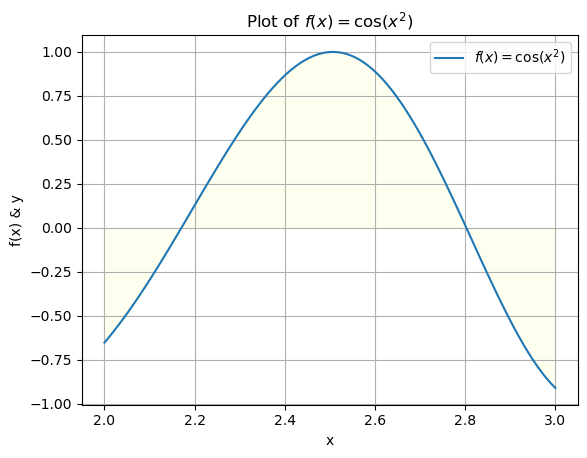

In [3]:
# Define the function
def f(x):
    return np.cos(x**2)

# Generate x values from 0 to 2
x = np.linspace(2, 3, 100)

# Generate y values using the function
y = f(x)

# Plot the function
plt.plot(x, y, label='$f(x) = \cos(x^2)$')
plt.fill_between(x, y, color='lightyellow', alpha=0.5)  # Fill the area under the curve
plt.xlabel('x')
plt.ylabel('f(x) & y')
plt.title('Plot of $f(x) = \cos(x^2)$')
plt.legend()
plt.grid(True)
plt.show()

#### PART B
Using the Monte Carlo technique, define a function in any programming language with a parameter for the number of darts that returns an estimate of the indicated value.

In [5]:
def monte_carlo_integral_estimate(num_points):
    total_positive_area = 0
    total_negative_area = 0
    
    for _ in range(num_points):
        # Generate random x coordinate within the interval [2, 3]
        x = np.random.uniform(2, 3)
        
        # Evaluate the function value at x
        fx = np.cos(x**2)
        
        # Accumulate positive and negative areas separately
        if fx >= 0:
            total_positive_area += fx
        else:
            total_negative_area += fx
    
    # Adjust for the negative portion of the function
    positive_portion = total_positive_area / num_points
    negative_portion = total_negative_area / num_points
    adjusted_area = positive_portion - negative_portion
    
    # Multiply by the interval width (3 - 2 = 1) to get the integral estimate
    integral_estimate = adjusted_area * 1
    
    return integral_estimate


#### PART C
Define a function that calls the function from Part b 1000 times and returns the mean and standard deviation of the results. 

In [6]:
def monte_carlo_mean_and_std(num_points, num_simulations):
    integral_estimates = []
    
    # Perform Monte Carlo simulations num_simulations times
    for _ in range(num_simulations):
        integral_estimate = monte_carlo_integral_estimate(num_points)
        integral_estimates.append(integral_estimate)
    
    # Calculate mean and standard deviation of the integral estimates
    mean_estimate = np.mean(integral_estimates)
    std_dev_estimate = np.std(integral_estimates)
    
    return mean_estimate, std_dev_estimate

In [7]:
num_points = 10000  # Adjust this number as needed
num_simulations = 1000
mean, std_dev = monte_carlo_mean_and_std(num_points, num_simulations)
print("Mean integral estimate:", mean)
print("Standard deviation of integral estimates:", std_dev)

Mean integral estimate: 0.5599927963703992
Standard deviation of integral estimates: 0.0030117908733262332


#### PART D
Using any computational tool or programming language, calculate the answer with integration. 

In [8]:
# Perform numerical integration
result, _ = quad(f, 2, 3)

print("Numerical integration result:", result)


Numerical integration result: 0.24140209529705237


#### PART E
Find the percentage error between the analytical solution and the solution by Monte Carlo’s method (the mean value from part c) for each of the questions. 

In [9]:
# Analytical solution obtained from numerical integration
analytical_solution = result  # This should be replaced with the actual numerical integration result from part d

# Mean value from Monte Carlo simulation (replace with actual value)
monte_carlo_mean = mean  # This should be replaced with the actual mean value from part c

# Calculate percentage error
percentage_error = np.abs((analytical_solution - monte_carlo_mean) / analytical_solution) * 100

print("Analytical solution:", analytical_solution)
print("Monte Carlo mean value:", monte_carlo_mean)
print("Percentage error:", percentage_error, "%")


Analytical solution: 0.24140209529705237
Monte Carlo mean value: 0.5599927963703992
Percentage error: 131.9751183937785 %
